# Library import

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from PIL import Image
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('matplotlib version : ', mpl.__version__)
print('seaborn version : ', sns.__version__)

pandas version :  1.1.5
numpy version :  1.19.2
matplotlib version :  3.2.1
seaborn version :  0.11.0


In [3]:
# 학습 데이터셋 폴더 경로를 지정해주세요.
train_dir = '/opt/ml/input/data/train'
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'

# Data load

In [4]:
train_info = pd.read_csv(os.path.join(train_dir, 'train.csv'))
test = pd.read_csv(os.path.join(test_dir, 'info.csv'))

## Dataset Head

In [5]:
train_info.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [6]:
test.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0


## Dataset Shape

In [7]:
train_info.shape

(2700, 5)

## Dataset Size

In [8]:
print(f'Trianing Info Shape: {train_info.shape}')
print(f'Traning Image Data: {train_info.shape[0] * 7}')
print(f'Test Dataset Shape: {test.shape}')

Trianing Info Shape: (2700, 5)
Traning Image Data: 18900
Test Dataset Shape: (12600, 2)


## train_info data information

In [9]:
train_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


대회 데이터라 그런지 깔끔하게 null 값이 없음

# Train_info Dataset columns Visualize

## 성별 비율

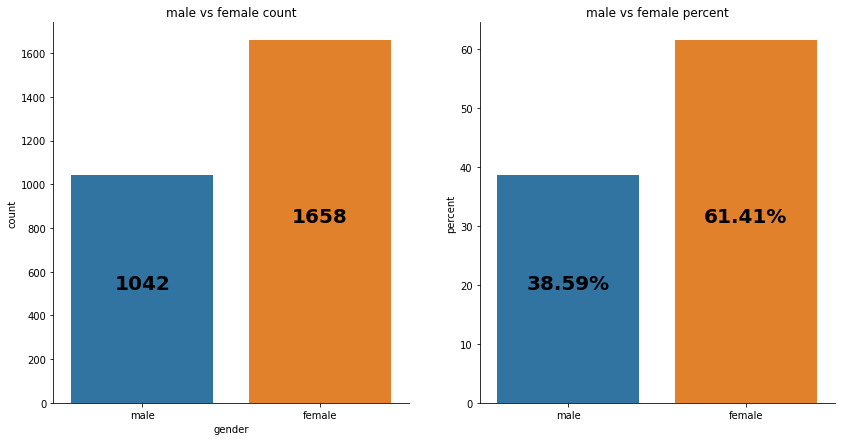

In [31]:
gender_rate = train_info['gender'].value_counts() / len(train_info) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes.flatten()

sns.countplot(x='gender', data=train_info, ax=axes[0],
              order=['male', 'female'])
axes[0].text(x=0, y=train_info['gender'].value_counts()[1] / 2, 
             s=train_info['gender'].value_counts()[1], 
             fontsize=20, 
             fontweight='semibold', 
             ha='center',
             linespacing=2,
            )
axes[0].text(x=1, y=train_info['gender'].value_counts()[0] / 2, 
             s=train_info['gender'].value_counts()[0], 
             fontsize=20, 
             fontweight='semibold', 
             ha='center',
             linespacing=2,
            )
axes[0].set_title('male vs female count')

sns.barplot(gender_rate.index, gender_rate, ax=axes[1],
            order=['male', 'female'])
axes[1].text(x=0, y=gender_rate[1] / 2, 
             s=f"{gender_rate[1]:.2f}%", 
             fontsize=20, 
             fontweight='semibold', 
             ha='center',
             linespacing=2,
            )
axes[1].text(x=1, y=gender_rate[0] / 2, 
             s=f"{gender_rate[0]:.2f}%", 
             fontsize=20, 
             fontweight='semibold', 
             ha='center',
             linespacing=2,
            )
axes[1].set_title('male vs female percent')
axes[1].set_ylabel('percent')

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [32]:
print(f"male 수: {train_info['gender'].value_counts()[1]}명 ({gender_rate[1]:.2f}%)")
print(f"female 수: {train_info['gender'].value_counts()[0]}명 ({gender_rate[0]:.2f}%)")
print(f"female 의 수가 male 의 수보다 {gender_rate[0] / gender_rate[1]:.2f}배")

male 수: 1042명 (38.59%)
female 수: 1658명 (61.41%)
female 의 수가 male 의 수보다 1.59배


## 나이

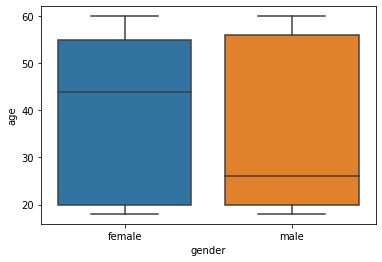

In [134]:
sns.boxplot(x='gender', y='age', data=train_info)
plt.show()

남자는 어린 사람이 더 많은 경향이 있고

여자는 44세 이상이 많은 경향이 있다.

## 나이대

In [33]:
train_info['age_band'] = train_info['age'].apply(lambda x: "10's" if x < 20 else "20's"
                                                 if x < 30 else "30's" if x < 40 else "40's"
                                                 if x < 50 else "50's" if x < 60 else "60's over")

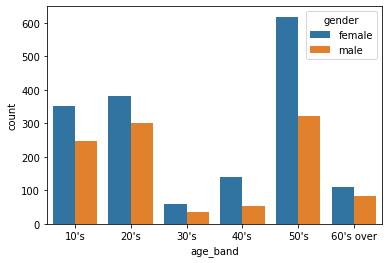

In [34]:
sns.countplot(x='age_band', data=train_info,
              hue='gender',
              order=sorted(train_info['age_band'].unique()))
plt.show()

전체적으로 여성의 비율이 남성의 비율보다 높다.

30대 40대의 사진은 유난히 부족하다.

50대는 여성의 비율이 거의 2배다.

In [37]:
train_info['age']

0       45
1       52
2       54
3       58
4       59
        ..
2695    19
2696    19
2697    19
2698    20
2699    19
Name: age, Length: 2700, dtype: int64

In [38]:
train_info['age_band']

0       >= 30 and < 60
1       >= 30 and < 60
2       >= 30 and < 60
3       >= 30 and < 60
4       >= 30 and < 60
             ...      
2695              < 30
2696              < 30
2697              < 30
2698              < 30
2699              < 30
Name: age_band, Length: 2700, dtype: object

In [39]:
def get_age_band(age):
    if age < 30:
        return '< 30'
    elif 30 <= age < 60:
        return '>= 30 and < 60'
    elif age >= 60:
        return '>= 60'

## 실제 target 에서는 `~ 29`, `30 ~ 59`, `60 ~` 으로 나이대를 분류

In [40]:
train_info['age_band'] = train_info['age'].apply(get_age_band)

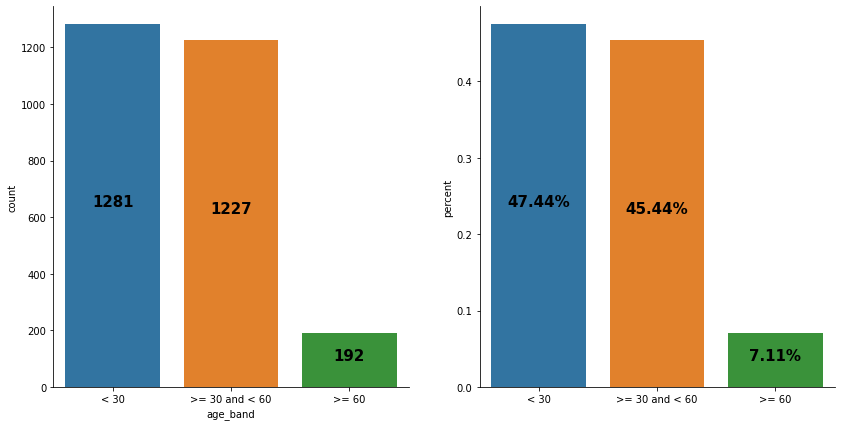

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.countplot(x='age_band', data=train_info, ax=axes[0],
              order=sorted(train_info['age_band'].unique()))

counts = train_info['age_band'].value_counts()
counts_pct = counts / sum(counts)

for i, cnt in enumerate(counts):
    axes[0].text(x=i, y=cnt / 2, s=cnt, ha='center',
                 fontsize=15, fontweight='semibold',
                )
    
sns.barplot(x=counts_pct.index, y=counts_pct, ax=axes[1])
axes[1].set_ylabel('percent')

for i, pct in enumerate(counts_pct):
    axes[1].text(x=i, y=pct / 2, s=f"{pct * 100:.2f}%", ha='center',
                 fontsize=15, fontweight='semibold',
                )
    
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

30세 미만이 1281명으로 가장 많고 30~59세가 1227명으로 2번째, 그리고 60대이상은 192명이다.

비율은 47.45%, 45.45% 7.11%로 60대 이상이 상당히 적은 비율이라서 이걸 어떻게 해결하면 좋을까?

전체적으로 남성보다 여성의 비율이 높다.

## 특이사항

# train_df 이미지 데이터를 가지고 만듦

In [81]:
def get_age_band(age):
    if age < 30:
        return '< 30'
    elif 30 <= age < 60:
        return '>= 30 and < 60'
    elif age >= 60:
        return '>= 60'

In [82]:
image_df_list = []
for idx, folder_dir in enumerate(tqdm(image_folder_list)):
    image_df = pd.DataFrame()
    file_list = glob.glob(folder_dir + '/*')
    if len(file_list) != 7:
        print(folder_dir)
    image_df['mask'] = ['Incorrect' if 'incorrect' in file.split('/')[-1].split('.')[0] else 'Not Wear' 
                        if 'normal' in file.split('/')[-1].split('.')[0] else 'Wear' 
                        for file in file_list]
    image_df['path'] = folder_dir.split('/')[-1]
    image_df['image_path'] = file_list
    image_df_list.append(image_df)
train_df = pd.concat(image_df_list, ignore_index=True)
train_df['age'] = train_df['path'].apply(lambda x: int(x.split('_')[-1]))
train_df['gender'] = train_df['path'].apply(lambda x: x.split('_')[1])
train_df['age_band'] = train_df['age'].apply(get_age_band)

100%|██████████| 2700/2700 [00:04<00:00, 627.06it/s]


In [83]:
train_df.shape

(18900, 6)

In [84]:
train_df.head()

,mask,path,image_path,age,gender,age_band
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60


## 데이터 노이즈 확인
- 사람마다 총 7장의 사진이 존재합니다. (마스크 정상 착용 5장, 미착용 1장, 이상하게 착용 1장).
- 이 파트에서는 이미지를 직접 시각화하여 눈으로 관찰하여 label에 문제가 없는지 확인해봅시다. 


In [74]:
def show_from_idx_list(folder_list, num, sex='male'):
    fig, axes = plt.subplots(10, 10, figsize=(25, 25))
    axes = axes.flatten()
    
    for i, folder_name in enumerate(folder_list):
        gender = folder_name.split('_')[1]
        age = folder_name.split('_')[-1]
        images_dir = os.path.join('images', folder_name)
        file_list = glob.glob(os.path.join(train_dir, images_dir + '/*'))
        for file_name in file_list:
            if 'normal' in file_name:
                img = np.array(Image.open(file_name))
                axes[i].imshow(img)
                axes[i].set_title(f'{folder_name.split("_")[0]}')
                axes[i].axis('off')
#     plt.savefig(f'./train_{sex}_normal_images/{num + 1}.png', dpi=300)
    plt.show()

## female 로 label 된 사진 확인

In [55]:
female_folder_list = sorted(train_df[train_df.path.str.contains('female')].path.unique().tolist())
female_folder_list[:5]

['000001_female_Asian_45',
 '000002_female_Asian_52',
 '000005_female_Asian_58',
 '000006_female_Asian_59',
 '000007_female_Asian_58']

In [56]:
len(female_index)

1649

In [ ]:
for i in tqdm(range(17)):
    show_from_idx_list(female_index[100 * i:100 * (i + 1)], i, 'female')

- 남자인데 여자로 lable 되어있다고 판단된 사람들
    - 000725
    - 000763
    - 000767
    - 000817
    - 001720
    - 003399
    - 006359
    - 006360
    - 006361
    - 006362
    - 006363
    - 006364

## male로 label 된 사진 확인

In [62]:
male_folder_list = sorted(train_df[train_df.path.str.contains('_male')].path.unique().tolist())
male_folder_list[:5]

['000004_male_Asian_54',
 '000012_male_Asian_57',
 '000015_male_Asian_55',
 '000033_male_Asian_57',
 '000043_male_Asian_56']

In [63]:
len(male_index)

1051

In [ ]:
for i in tqdm(range(11)):
    show_from_idx_list(male_folder_list[100 * i:100 * (i + 1)], i, 'male')

- 여자인데 남자로 lable 되어있다고 판단된 사람들
    - 004432
    - 001498-1
    - 005223

In [75]:
def show_incorrect_from_idx_list(folder_list, num, sex='male'):
    fig, axes = plt.subplots(10, 10, figsize=(25, 25))
    axes = axes.flatten()
    
    for i, folder_name in enumerate(folder_list):
        gender = folder_name.split('_')[1]
        age = folder_name.split('_')[-1]
        images_dir = os.path.join('images', folder_name)
        file_list = glob.glob(os.path.join(train_dir, images_dir + '/*'))
        for file_name in file_list:
            if 'incorrect' in file_name:
                img = np.array(Image.open(file_name))
                axes[i].imshow(img)
                axes[i].set_title(f'{folder_name.split("_")[0]}')
                axes[i].axis('off')
#     plt.savefig(f'./train_{sex}_normal_images/{num + 1}.png', dpi=300)
    plt.show()

In [ ]:
for i in tqdm(range(17)):
    show_incorrect_from_idx_list(female_folder_list[100 * i:100 * (i + 1)], i, 'female')

- 여자 중에 마스크 안썼는데 incorrect_mask 라고 되어 있는 사람
    - 000020

In [ ]:
for i in tqdm(range(11)):
    show_incorrect_from_idx_list(male_folder_list[100 * i:100 * (i + 1)], i, 'male')

- 남자 중에 마스크 안썼는데 incorrect_mask 라고 되어 있는 사람
    - 004418
    - 005227

In [86]:
image_df_list = []
for idx, folder_dir in enumerate(tqdm(image_folder_list)):
    image_df = pd.DataFrame()
    file_list = glob.glob(folder_dir + '/*')
    if len(file_list) != 7:
        print(folder_dir)
    image_df['mask'] = ['Incorrect' if 'incorrect' in file.split('/')[-1].split('.')[0] else 'Not Wear' 
                        if 'normal' in file.split('/')[-1].split('.')[0] else 'Wear' 
                        for file in file_list]
    image_df['path'] = folder_dir.split('/')[-1]
    image_df['image_path'] = file_list
    image_df_list.append(image_df)
train_df = pd.concat(image_df_list, ignore_index=True)
train_df['age'] = train_df['path'].apply(lambda x: int(x.split('_')[-1]))
train_df['gender'] = train_df['path'].apply(lambda x: x.split('_')[1])
train_df['age_band'] = train_df['age'].apply(get_age_band)

100%|██████████| 2700/2700 [00:04<00:00, 627.24it/s]


In [87]:
train_df.head()

,mask,path,image_path,age,gender,age_band
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60


## Train Images

In [ ]:
%%time
fig, axes = plt.subplots(5, 7, figsize=(15, 15))

sample_path = np.random.choice(train_df.path.unique(), 5)
for i, path in enumerate(sample_path):
    folder_dir = os.path.join('images/' + path + '/*')
    file_list = sorted(glob.glob(os.path.join(train_dir, folder_dir)))
    for j, file_name in enumerate(file_list):
        img = plt.imread(file_name)
        axes[i][j].imshow(img)
        axes[i][j].set_title(file_name.split('/')[-1].split('.')[0])
        axes[i][j].axis('off')

plt.show()

## Test Images

In [ ]:
%%time
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
axes.flatten()

sample_idx = np.random.randint(0, test.shape[0], 5)
for i, idx in enumerate(sample_idx):
    images_path = os.path.join('images/' + test.iloc[idx].ImageID)
    file_name = os.path.join(test_dir, images_path)
    
    img = plt.imread(file_name)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()

## Image Size

In [91]:
train_df.head()

,mask,path,image_path,age,gender,age_band
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60


In [98]:
images_info = {'height': [], 'width': [], 'means': [], 'stds': []}
for i, path in enumerate(tqdm(train_df.sample(100).path.unique())):
    folder_dir = os.path.join('images/' + path + '/*')
    file_list = sorted(glob.glob(os.path.join(train_dir, folder_dir)))
    for file_name in file_list:
        img = np.array(Image.open(file_name))
        h, w, _ = img.shape
        images_info['height'].append(h)
        images_info['width'].append(w)
        images_info['means'].append(img.mean(axis=(0, 1)))
        images_info['stds'].append(img.std(axis=(0, 1)))

100%|██████████| 98/98 [00:13<00:00,  7.14it/s]


In [99]:
print('Train Data')
print(f'Total number of people is {len(train_info)}')
print(f'Total number of images is {len(train_info) * 7}')

print(f'Minimum height for dataset is {np.min(images_info["height"])}')
print(f'Maximum height for dataset is {np.max(images_info["height"])}')
print(f'Average height for dataset is {int(np.mean(images_info["height"]))}')
print(f'Minimum width for dataset is {np.min(images_info["width"])}')
print(f'Maximum width for dataset is {np.max(images_info["width"])}')
print(f'Average width for dataset is {int(np.mean(images_info["width"]))}')

print(f'RGB Mean: {np.mean(images_info["means"], axis=0) / 255.}')
print(f'RGB Standard Deviation: {np.mean(images_info["stds"], axis=0) / 255.}')

Train Data
Total number of people is 2700
Total number of images is 18900
Minimum height for dataset is 512
Maximum height for dataset is 512
Average height for dataset is 512
Minimum width for dataset is 384
Maximum width for dataset is 384
Average width for dataset is 384
RGB Mean: [0.56778676 0.52758572 0.50513912]
RGB Standard Deviation: [0.23344479 0.24593298 0.2498421 ]


In [100]:
test_images_info = {'height': [], 'width': [], 'means': [], 'stds': []}
for path in tqdm(test.sample(100).ImageID):
    images_path = os.path.join('images/' + path)
    file_name = os.path.join(test_dir, images_path)
    
    img = np.array(Image.open(file_name))
    h, w, _ = img.shape
    test_images_info['height'].append(h)
    test_images_info['width'].append(w)
    test_images_info['means'].append(img.mean(axis=(0, 1)))
    test_images_info['stds'].append(img.std(axis=(0, 1)))

100%|██████████| 100/100 [00:02<00:00, 49.96it/s]


In [101]:
print('Test Data')
print(f'Total number of images is {len(test)}')

print(f'Minimum height for dataset is {np.min(test_images_info["height"])}')
print(f'Maximum height for dataset is {np.max(test_images_info["height"])}')
print(f'Average height for dataset is {int(np.mean(test_images_info["height"]))}')
print(f'Minimum width for dataset is {np.min(test_images_info["width"])}')
print(f'Maximum width for dataset is {np.max(test_images_info["width"])}')
print(f'Average width for dataset is {int(np.mean(test_images_info["width"]))}')

print(f'RGB Mean: {np.mean(test_images_info["means"], axis=0) / 255.}')
print(f'RGB Standard Deviation: {np.mean(test_images_info["stds"], axis=0) / 255.}')

Test Data
Total number of images is 12600
Minimum height for dataset is 512
Maximum height for dataset is 512
Average height for dataset is 512
Minimum width for dataset is 384
Maximum width for dataset is 384
Average width for dataset is 384
RGB Mean: [0.52008307 0.46465991 0.43471954]
RGB Standard Deviation: [0.23713984 0.24678447 0.24142549]


Image size 는 모두 동일하다.

RGB Mean 이 Test set 에서 낮음

## Labeling

![image.png](target_info.png)

In [102]:
train_df.head()

,mask,path,image_path,age,gender,age_band
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,45,female,>= 30 and < 60


In [103]:
def get_label(row):
    if row['mask'] == 'Wear':
        if row['gender'] == 'male':
            if row['age_band'] == '< 30':
                return 0
            elif row['age_band'] == '>= 30 and < 60':
                return 1
            else:
                return 2
        else:
            if row['age_band'] == '< 30':
                return 3
            elif row['age_band'] == '>= 30 and < 60':
                return 4
            else:
                return 5
    elif row['mask'] == 'Incorrect':
        if row['gender'] == 'male':
            if row['age_band'] == '< 30':
                return 6
            elif row['age_band'] == '>= 30 and < 60':
                return 7
            else:
                return 8
        else:
            if row['age_band'] == '< 30':
                return 9
            elif row['age_band'] == '>= 30 and < 60':
                return 10
            else:
                return 11
    else:
        if row['gender'] == 'male':
            if row['age_band'] == '< 30':
                return 12
            elif row['age_band'] == '>= 30 and < 60':
                return 13
            else:
                return 14
        else:
            if row['age_band'] == '< 30':
                return 15
            elif row['age_band'] == '>= 30 and < 60':
                return 16
            else:
                return 17

In [79]:
train_df['target'] = train_df.apply(get_label, axis=1)

In [80]:
train_df.head()

,mask,path,image_path,id,gender,race,age,age_band,target
0,Incorrect,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,10
1,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,4
2,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,4
3,Not Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,16
4,Wear,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,000001,female,Asian,45,>= 30 and < 60,4


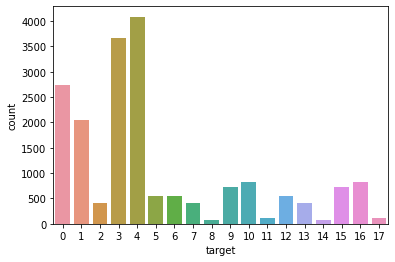

In [81]:
sns.countplot(x='target', data=train_df)
plt.show()

클래스 불균형이 심하다.

해결할 방법을 찾아야 한다.

In [109]:
len(train_df) // train_df.target.value_counts()

4       4
3       5
0       6
1       9
16     23
10     23
15     26
9      26
12     34
6      34
5      34
2      45
7      45
13     45
11    173
17    173
8     227
14    227
Name: target, dtype: int64

In [80]:
train.to_csv(os.path.join(train_dir, 'train_with_label.csv'), index=False)